# Chaos and Randomness

Author: Eric Jang

```
For want of a nail the shoe was lost.
For want of a shoe the horse was lost.
For want of a horse the rider was lost.
For want of a rider the message was lost.
For want of a message the battle was lost.
For want of a battle the kingdom was lost.
And all for the want of a horseshoe nail.
```
[For Want of a Nail](https://en.wikipedia.org/wiki/For_Want_of_a_Nail)

Was the kingdom lost due to random chance? Or was it the inevitable outcome resulting from sensitive dependence on initial conditions? Perhaps both?


# Logistic Map

In [222]:
function logistic_map(r, x)
   r*x*(1-x) 
end
x = zeros(1000)
x[1] = 0.5
for i=1:1000-1
   x[i+1] = logistic_map((r=3.25, x=x[i])...) 
end

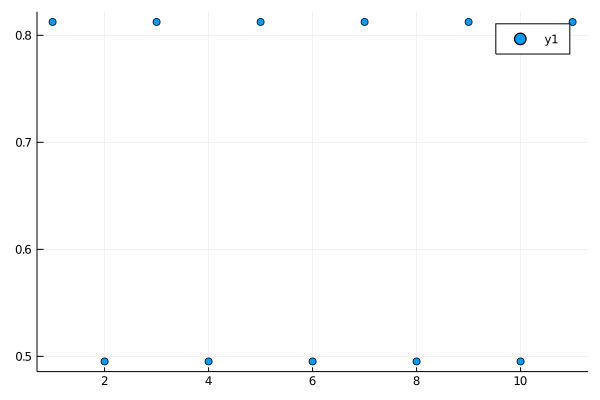

In [230]:
using Plots
p = scatter(x[end-10:end])
savefig(p, "logistic-dynamics.png")
p

## Chaos in the Logistic Family

One of the simplest one-dimensional dynamical systems to exhibit chaotic behavior is the logistic map.

In [232]:
# Generate orbit diagrams (n=2000) for several rs, x0s
rs = [2.8:0.01:3.3; 3.3:0.001:4.0]
x0s = 0.1:0.1:0.6
N = 2000 # orbit length
x = zeros(length(rs), length(x0s), N)
# for each starting condtion (across rows)
for k = 1:length(rs)
    # initialize starting condition
    x[k, :, 1] = x0s
    for i = 1:length(x0s)
       # generate orbit (across columns)
       for j = 1:N-1
            x[k, i, j+1] = logistic_map((r=rs[k] , x=x[k, i, j])...)
       end
    end
end

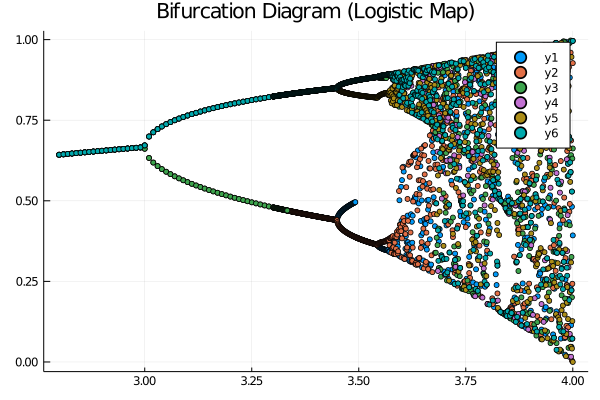

In [234]:
p = plot(rs, x[:, :, end], markersize=3, seriestype = :scatter, title = "Bifurcation Diagram (Logistic Map)")
savefig(p, "bifurcation-logistic.png")
p

# Spatial Measurement Error Generates Randomness

Now imagine we can only know a finite measurement precision of values in these orbits, which we can model by starting a bunch of orbits with a small amount of random (uniform) noise added corresponding to precision. We can generate 1000 starting conditions that are identical up to our measurement precision, and observe the histogram of where the system ends up after 1000 iterations of the logistic map.

In [217]:
LinRange(0, 10, 100)

100-element LinRange{Float64}:
 0.0,0.10101,0.20202,0.30303,0.40404,…,9.59596,9.69697,9.79798,9.89899,10.0

In [220]:
precisions = reverse(1:12)
N = 1000
num_rand = 1000
randspace = LinRange(0, 1, num_rand)
x = zeros(length(precisions), num_rand, N)
# for each starting condtion (across rows)
for k = 1:length(precisions)
    # initialize starting condition
    x0s = [0.5 + a*(10.0)^(-precisions[k]) for a=randspace]
    x[k, :, 1] = x0s
    for i = 1:length(x0s)
       # generate orbit (across columns)
       for j = 1:N-1
            x[k, i, j+1] = logistic_map((r=3.7 , x=x[k, i, j])...)
       end
    end
end


┌ Info: Saved animation to 
│   fn = C:\Users\ejang-pc\Desktop\chaos_randomness\mygif.gif
└ @ Plots C:\Users\ejang-pc\.julia\packages\Plots\M1wcx\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\ejang-pc\\Desktop\\chaos_randomness\\mygif.gif")
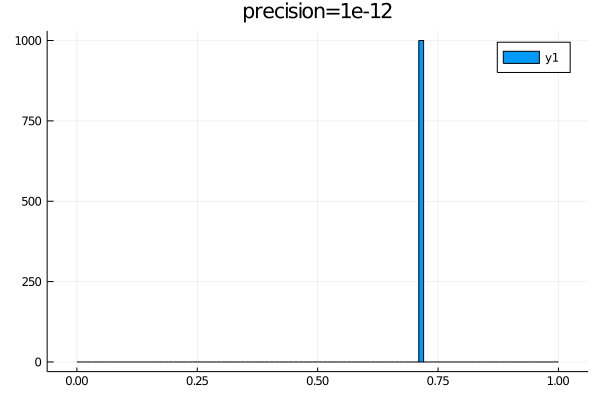

In [221]:
anim = @animate for k=1:length(precisions)
    histogram(x[k, :, end], bins=0:0.01:1.0, title="precision=1e-$(precisions[k])")
end

gif(anim, "mygif.gif", fps = 0.5)